In [6]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from matplotlib import pyplot as plt

In [7]:
# One learning cycle
def learning_cycle(maze, stop_steps, learning_rate, discount_factor, epsilon, plotting_enabled, learning_enabled):

    # Create a robot, selection object and Qlearning object
    robot = Agent(0, 0)
    selection = MyEGreedy()
    learn = MyQLearning()

    # For plotting statistics
    steps_per_episode = []

    # For stopping
    steps = 0
    stop = False

    while not stop:

        # Stopping Criterion
        if steps >= stop_steps:
            stop = True
            break
        steps += 1

        # If robot reached the goal, end the episode and reset
        if robot.x == final_state_x and robot.y == final_state_y:
            steps_per_episode.append(robot.nr_of_actions_since_reset)
            robot.reset()

        # Select action
        prev_state = robot.get_state(maze)
        action = selection.get_egreedy_action(robot, maze, learn, epsilon)

        # Execute the action
        new_state = robot.do_action(action, maze)
        possible_actions = maze.get_valid_actions(robot)
        r_observed = maze.get_reward(new_state)

        # Update Q-Table (if learning is enabled)
        if(learning_enabled):
            learn.update_q(prev_state, action, r_observed, new_state, possible_actions, learning_rate, discount_factor)

    # Plot steps over episodes (if plotting is enabled)
    if plotting_enabled:
        plt.plot(range(len(steps_per_episode)), steps_per_episode)
        plt.xlabel("Episode")
        plt.ylabel("Number of steps to finish that episode")
        plt.show()
        print("Steps per episode:", steps_per_episode)
        print()

    return steps_per_episode

In [8]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
final_state_x = 9
final_state_y = 9
maze.set_reward(maze.get_state(final_state_x, final_state_y), 10)

Ready reading maze file ../data/toy_maze.txt
Ready reading maze file ../data/toy_maze.txt


In [9]:
# Set learning parameters
learning_enabled = True

learning_rate = 0.7
discount_factor = 0.9
epsilon = 0.1
stop_steps = 30000

runs = 10           # number of independent learning cycles to execute

plotting_enabled = False

# Execute the learning cycles
sum_steps_per_episode = []
runs_that_reached_episode = []
avg_steps_per_episode = []

for i in range(runs):
    print("In run {} ...".format(i+1))
    steps_per_episode = learning_cycle(maze, stop_steps, learning_rate, discount_factor, epsilon, plotting_enabled, learning_enabled)

    # Update statistics
    for e, steps in enumerate(steps_per_episode):
        if (e >= len (sum_steps_per_episode)):
            sum_steps_per_episode.append(steps)
            runs_that_reached_episode.append(1)
        else:
            sum_steps_per_episode[e] += steps
            runs_that_reached_episode[e] += 1

# Compute average steps per episode (over the runs)
for i in range(len(sum_steps_per_episode)):
    avg_steps_per_episode.append(sum_steps_per_episode[i]/runs_that_reached_episode[i])

In run 1 ...
In run 2 ...
In run 3 ...
In run 4 ...
In run 5 ...
In run 6 ...
In run 7 ...
In run 8 ...
In run 9 ...
In run 10 ...
In run 1 ...
In run 2 ...
In run 3 ...
In run 4 ...
In run 5 ...
In run 6 ...
In run 7 ...
In run 8 ...
In run 9 ...
In run 10 ...


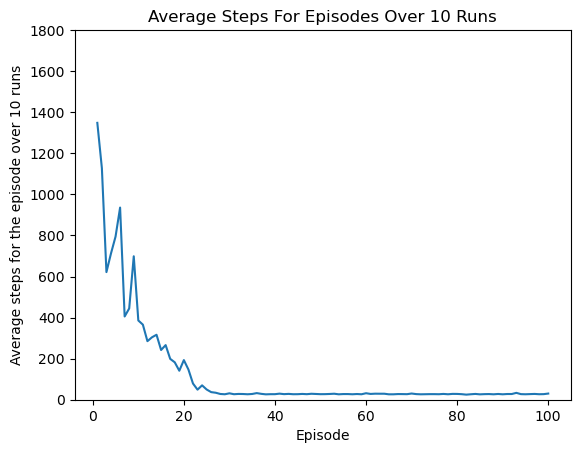

Average steps per episode:
[1348.4, 1127.8, 621.6, 712.4, 794.4, 935.8, 405.4, 444.6, 698.6, 386.0, 365.6, 285.2, 304.0, 316.4, 242.2, 266.0, 199.0, 182.2, 141.2, 193.0, 147.2, 79.0, 49.0, 70.0, 49.8, 37.0, 34.0, 28.0, 26.6, 31.2, 26.8, 28.2, 27.8, 26.6, 28.0, 32.2, 28.6, 26.2, 27.0, 27.0, 29.6, 27.2, 28.4, 26.8, 27.0, 28.2, 27.0, 29.0, 28.0, 27.0, 27.2, 28.0, 29.2, 26.4, 27.6, 27.6, 26.6, 27.8, 26.6, 31.6, 28.2, 29.4, 29.2, 29.2, 26.4, 26.4, 27.6, 27.4, 27.0, 30.2, 27.4, 26.4, 26.8, 27.2, 27.2, 26.8, 28.2, 26.6, 28.4, 28.2, 27.0, 24.8, 26.6, 28.2, 26.2, 27.2, 27.6, 26.4, 28.0, 26.4, 27.8, 27.8, 33.4, 27.2, 26.6, 27.4, 28.2, 26.8, 27.2, 30.0]


In [11]:
# Plot average steps per episode (over the runs)

max_episode = 100                                   # !! specific value won't work if larger than length of the data array
#max_episode = len(avg_steps_per_episode)           # displays all available data

# displays only the episodes reached by all runs
# max_episode = len(runs_that_reached_episode) - runs_that_reached_episode[::-1].index(max(runs_that_reached_episode))

plt.plot(range(1, max_episode + 1), avg_steps_per_episode[:max_episode])
plt.ylim([0, 1800])
plt.xlabel("Episode")
plt.ylabel("Average steps for the episode over {} runs".format(runs))
plt.title("Average Steps For Episodes Over {} Runs".format(runs))
plt.show()

print("Average steps per episode:")
print(avg_steps_per_episode[:max_episode])